Linking: https://zhuanlan.zhihu.com/p/612214552

下面对sklearn.cluster模块中的参数进行说明.该函数的调用方法为 DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)

该算法提供了多个可调参数，以控制算法的聚类效果。下面对常用的参数进行详细说明：

- eps: 控制着半径的大小，是判断两个数据点是否属于同一簇的距离阈值。默认值为0.5。
- min_samples: 控制着核心点周围所需的最小数据点数。默认值为5。
- metric: 用于计算距离的度量方法，可以选择的方法包括欧式距离(euclidean)、曼哈顿距离(manhattan)等。默认值为欧式距离。
- algorithm: 用于计算距离的算法，可以选择的算法包括Ball Tree(ball_tree)、KD Tree(kd_tree)和brute force(brute)。Ball Tree和KD Tree算法适用于高维数据，brute force算法适用于低维数据。默认值为auto，自动选择算法。
- leaf_size: 如果使用Ball Tree或KD Tree算法，这个参数指定叶子节点的大小。默认值为30。
- p: 如果使用曼哈顿距离或闵可夫斯基距离(minkowski)，这个参数指定曼哈顿距离的p值。默认值为2，即欧式距离。
- n_jobs: 指定并行运算的CPU数量。默认值为1，表示单CPU运算。如果为-1，则使用所有可用的CPU。
- metric_params: 如果使用某些度量方法需要设置额外的参数，可以通过这个参数传递这些参数。默认值为None。

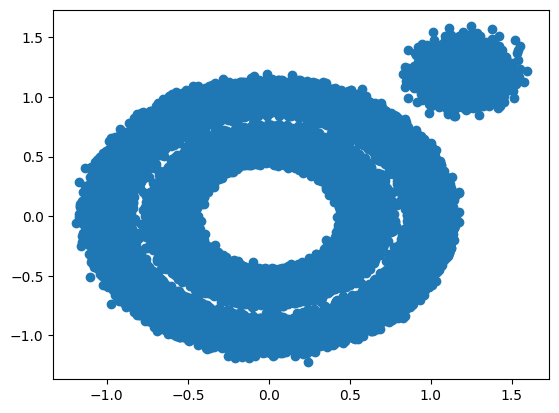

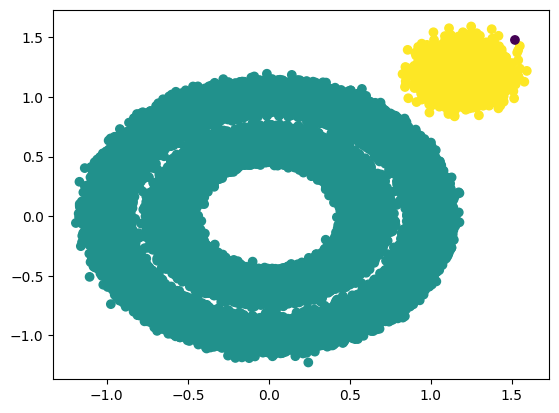

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN
%matplotlib inline
X1, y1 = datasets.make_circles(n_samples=300000, factor=.6,
                               noise=.05)
X2, y2 = datasets.make_blobs(n_samples=10000, n_features=2, centers=[[1.2, 1.2]], cluster_std=[[.1]],
                             random_state=9)

X = np.concatenate((X1, X2))
# 展示样本数据分布
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()
# eps和min_samples 需要进行调参
y_pred = DBSCAN(eps=0.1, min_samples=10).fit_predict(X)
# 分类结果
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()